<a href="https://colab.research.google.com/github/Luciaarrabali/TFG/blob/main/TFG_ArrabaliCa%C3%B1ete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizaje automático explicable en el pronóstico y la predicción del cáncer



#### Arrabali Cañete, Carmen Lucía
###### Septiembre 2023

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. Importar librerías necesarias
Para este proyecto se va a hacer uso de las siguientes librerías:


*   *NumPy*: útil para poder crear vectores y matrices de gran tamaño multidimensional, junto con una gran colección de funciones matemáticas de alto nivel.
*   *Pandas*: especializada en la manipulación y análisis de datos.
*   *Seaborn*: biblioteca de visualización de datos basada en Matplotlib.
*   *Matplotlib*: biblioteca para la generación de gráficos en dos dimensiones, a partir de datos contenidos en listas o en arrays.
* *Sklearn*: es un conjunto de rutinas escritas en Python para hacer análisis predictivo, que incluyen clasificadores, algoritmos de clusterización, etc. Está basada en *NumPy*, *SciPy* y *matplotlib*, de forma que es fácil reaprovechar el código que use estas librerías.





In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
import os
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## 2. Importar datos

Estos datos se han obtenido en [la base de datos de cáncer de pulmón](https://data.world/cancerdatahp/lung-cancer-data). Se trata de un dataset que contiene información de pacientes que tienen cáncer de pulmón.

In [ ]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/cancer_datasets.csv")

Para poder visualizar los datos, se aplica la función `head()` al dataset. Por otro lado, se aplica también la función `info()` para obtener la información de los datos que incluye el archivo, incluyendo las columnas, el número de datos no nulos que hay y el tipo de datos que es.


In [ ]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


Los datos que se encuentran dentro del Dataset son los siguientes:

* *Age:* Edad del paciente en años.
* *Gender:*	El género del paciente. 1 = Hombre; 2 = Mujer.
* *Air pollution:*	Nivel de exposición a la contaminación atmosférica del paciente.
* *Alcohol use:* El nivel de consumo de alcohol del paciente.
* *Dust allergy:*	El nivel de alergia al polvo del paciente.
* *Occupational hazards:* El nivel de riesgos laborales del paciente.
* *Genetic risk:* El nivel de riesgo genético del paciente.
* *Chronic lung disease:* El nivel de enfermedad pulmonar crónica del paciente.
* *Balanced diet:*	El nivel de dieta equilibrada del paciente.
* *Obesity:* El nivel de obesidad del paciente.
* *Smoking:* Nivel de tabaquismo del paciente.
* *Passive smoker:* El nivel de fumador pasivo del paciente.
* *Chest pain:* Nivel de dolor torácico del paciente.
* *Coughing of blood:*	Nivel de tos con sangre del paciente.
* *Fatigue*:	El nivel de fatiga del paciente.
* *Weight loss:* Nivel de pérdida de peso del paciente.
* *Shortness of breath:*	El nivel de dificultad respiratoria del paciente.
* *Wheezing:* El nivel de sibilancias del paciente.
* *Swallowing difficulty:* Nivel de dificultad para tragar del paciente.
* *Clubbing of finger nails:* El nivel de palidez de las uñas de las manos del paciente.
* *Frequent cold:* Nivel de resfriado frecuente del paciente.
* *Dry cough:* Nivel de tos seca del paciente.
* *Snoring:* Nivel de ronquidos del paciente cuando está dormido.
* *Level:* La gravedad del cáncer que tiene el paciente, puede ser alto, medio o bajo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

## 3. Preprocesado de los datos



Por un lado, se busca si hay algun dato nulo para poder hacer un preprocesado de datos y así poder hacer uso únicamente de datos válidos. Para ello, se aplica la función `isnull()` y `sum()` para hacer el recuento.

In [ ]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

En este caso, de todas las categorías de datos, ninguna de ellas contiene datos nulos.

Continuando con el análisis previo de los datos, se utiliza la función `drop()` para poder eliminar aquellas columnas que no son relevantes para el análisis de los datos, como puede ser el *index* y el *Patient ID*.

In [ ]:
df.drop(["index", "Patient Id"], axis = 1, inplace = True)
df

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


Además, se utiliza la función `rename()` para modificar el nombre de las columnas, que sean todos en minúscula y, además, sustituir el espacio por un guión bajo y que así quede estandarizado.

In [ ]:
df.rename(columns=str.lower, inplace=True)
df.rename(columns={col: col.replace(" ", "_") for col in df.columns}, inplace=True)
df

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring,level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


También se hace uso de la función `describe()` que genera estadísticas descriptivas de los mismos, que incluye la media, la mediana, entre otros valores estadísticos.

In [ ]:
df.describe()

,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,...,coughing_of_blood,fatigue,weight_loss,shortness_of_breath,wheezing,swallowing_difficulty,clubbing_of_finger_nails,frequent_cold,dry_cough,snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


Mientras que la gran mayoría de datos están en el rango de 1 a 9, la edad está comprendida entre 14 y 73, valores que se estandarizarán más adelante.

<ipython-input-10-c2842d2c48ce>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu, fmt=".1f")


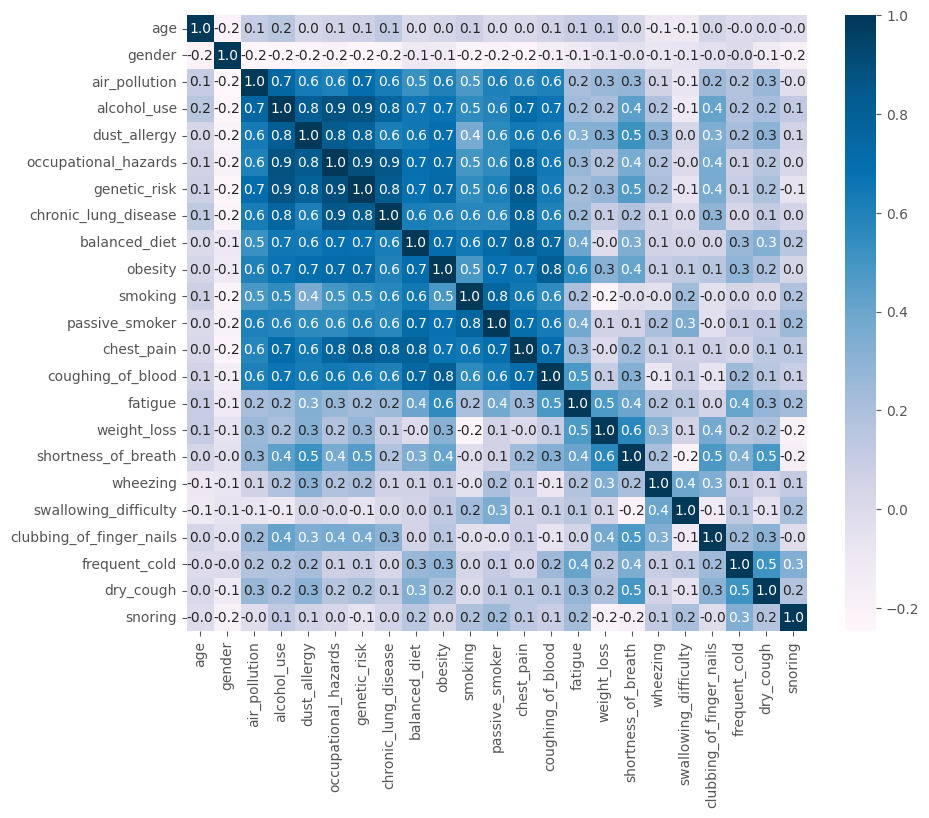

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.PuBu, fmt=".1f")
plt.show()

Como se puede observar en el *heatmap*, hay ciertas condiciones médicas que tienen mayor probabilidad de tener cáncer de pulmón y otras que no son tan relevantes. En el caso de aquellas que si son mucho más importantes a la hora de decidir si ese paciente tiene cáncer, habría que tener más en cuenta la contaminación del aire, el uso de alcohol, riesgo genético de padecer cáncer o si tiene una enfermedad crónica de pulmón, que la edad o el género no es tan relevante.

Adicional a lo anterior, se quiere visualizar la cantidad que hay de pacientes por nivel, en este caso *low*, *medium* y *high*.

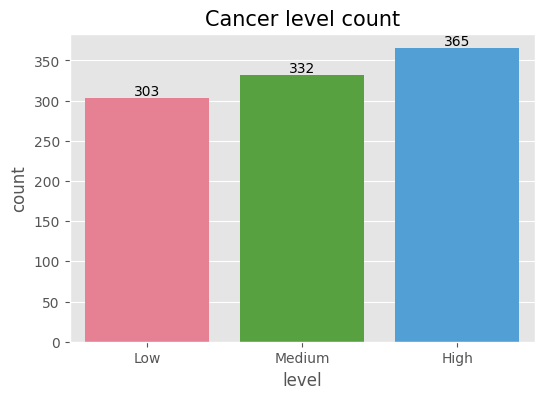

In [ ]:
plt.figure(figsize = (6,4))
data = sns.countplot(x=df.level, palette = "husl")
for bars in data.containers:
    data.bar_label(bars)
plt.title("Cancer level count", fontsize = 15);

En la imagen anterior se pueden observar 3 histogramas que comparan la edad de los pacientes con respecto al nivel de cáncer que padece.
Adicional a eso, hay que estandarizar los datos de la columna *level* de manera que queden en formato `integer`.

In [ ]:
print('Nivel de cáncer: ', df['level'].unique())

df["level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
print('Nivel de cáncer: ', df['level'].unique())

print('\nColumnas en el conjunto de datos: \n', df.columns)

Nivel de cáncer:  ['Low' 'Medium' 'High']
Nivel de cáncer:  [0 1 2]

Columnas en el conjunto de datos: 
 Index(['age', 'gender', 'air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'fatigue', 'weight_loss', 'shortness_of_breath',
       'wheezing', 'swallowing_difficulty', 'clubbing_of_finger_nails',
       'frequent_cold', 'dry_cough', 'snoring', 'level'],
      dtype='object')


A continuación, se prepararn los datos para poder hacer un entrenamiento de los mismos. De manera que solo se analizan los datos más relevantes para la investigación, como puede ser el uso de alcohol, el riesgo genético o la enfermedad crónica de pulmón.

In [ ]:
selected_columns = ['air_pollution', 'alcohol_use', 'dust_allergy',
       'occupational_hazards', 'genetic_risk', 'chronic_lung_disease',
       'balanced_diet', 'obesity', 'smoking', 'passive_smoker', 'chest_pain',
       'coughing_of_blood', 'level']

prepared_data = df[selected_columns]
prepared_data = prepared_data.dropna(axis=0)
prepared_data.describe(include='all')

,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,obesity,smoking,passive_smoker,chest_pain,coughing_of_blood,level
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,3.948000,4.195000,4.438000,4.859000,1.062000
std,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,2.495902,2.311778,2.280209,2.427965,0.815365
min,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,2.000000,2.000000,2.000000,3.000000,0.000000
50%,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,1.000000
75%,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,2.000000
max,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,8.000000,8.000000,9.000000,9.000000,2.000000


## Entrenamiento y prueba. División de los datos

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(prepared_data)
y = df.level

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.20, random_state=1)

### Función para medir el rendimiento
Se va a utilizar para poder visualizar el rendimiento de los distintos algoritmos que se van a aplicar al conjunto de datos.

In [ ]:
def measure_perform(y_pred):
    print("Precision: ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall: ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print("F1 Score: ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot(cmap=plt.cm.Blues)

### **Decision trees**
Los árboles de decisión son un tipo de algoritmo de aprendizaje supervisado utilizado para tareas de clasificación y regresión. Representan un flujo de decisiones en forma de árbol, donde cada nodo interno representa una característica o atributo, cada rama corresponde a una decisión basada en ese atributo, y cada hoja representa una clase o valor de salida.

El objetivo es dividir el conjunto de datos en subconjuntos más puros en términos de clase o valor de salida, minimizando la impureza en cada nodo.Los árboles de decisión son fáciles de interpretar y visualizar, pero pueden ser propensos a sobreajuste si no se controlan adecuadamente.

Precision:  1.0
Recall:  1.0
Accuracy:  1.0
F1 Score:  1.0

 [[62  0  0]
 [ 0 62  0]
 [ 0  0 76]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        76

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************



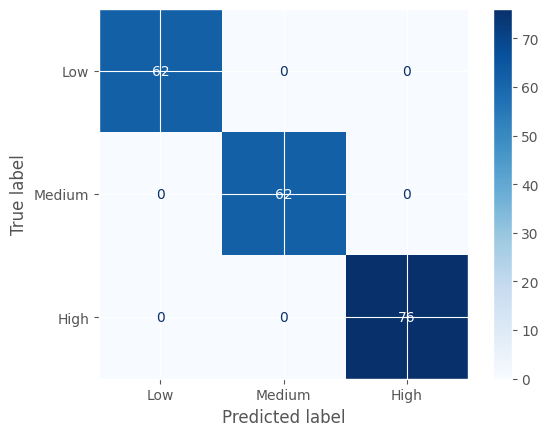

In [ ]:
# Creación del modelo
model_dt = DecisionTreeClassifier()

# Entrenamiento del modelo
model_dt.fit(x_train, y_train)

# Predicción y evaluación del modelo
y_pred_dt = model_dt.predict(x_test)
measure_perform(y_pred_dt)

### **Random Forest**
Los bosques aleatorios son una técnica de aprendizaje automático que combina múltiples árboles de decisión para obtener una mayor precisión y reducir el sobreajuste. Construyen múltiples árboles de decisión independientes utilizando diferentes subconjuntos aleatorios de datos de entrenamiento y características.

El proceso de combinación de múltiples árboles reduce la variabilidad y mejora la precisión general del modelo. Los bosques aleatorios son robustos, eficientes y se utilizan comúnmente para problemas de clasificación y regresión en conjuntos de datos grandes y complejos.

En primer lugar habría que crear el modelo para así poder entrenarlo. Al tener el modelo entrenado, se procedería a la predicción y a la evaluación del mismo.

Precision:  1.0
Recall:  1.0
Accuracy:  1.0
F1 Score:  1.0

 [[62  0  0]
 [ 0 62  0]
 [ 0  0 76]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        76

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************



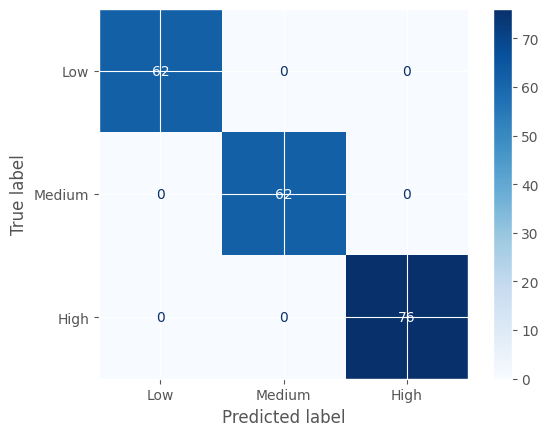

In [ ]:
# Creación del modelo
model_rf = RandomForestClassifier()

# Entrenamiento del modelo
model_rf.fit(x_train, y_train)

# Predicción y evaluación del modelo
y_pred_rf = model_rf.predict(x_test)
measure_perform(y_pred_rf)

### **Naive Bayes**
Naive Bayes es un algoritmo de aprendizaje supervisado utilizado principalmente para tareas de clasificación. Se basa en el teorema de Bayes y asume independencia condicional entre las características del conjunto de datos.

Precision:  1.0
Recall:  1.0
Accuracy:  1.0
F1 Score:  1.0

 [[62  0  0]
 [ 0 62  0]
 [ 0  0 76]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        62
           2       1.00      1.00      1.00        76

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

******************************************************



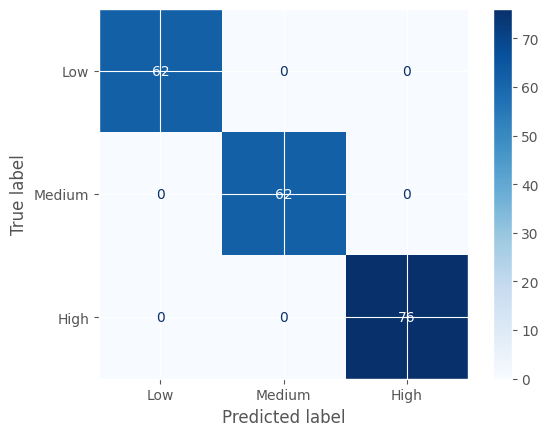

In [ ]:
# Creación del modelo
model_nb = GaussianNB()

# Entrenamiento del modelo
model_nb.fit(x_train, y_train)

# Predicción y evaluación del modelo
y_pred_nb = model_nb.predict(x_test)
measure_perform(y_pred_nb)